In [1]:
import numpy as np
import pandas as pd
import locale

#
#
# Table 1.1 Operations
#
#


#
# 'companies' data frame creation and pre-processing (before merge)
#

# create the companies dataframe from the companies file: 
companies = pd.read_csv("companies.txt", sep="\t", encoding = "ISO-8859-1")

# rename the 'permalink' field to 'company_permalink' to match the name in the rounds2 file 
# so as to be able to merge the two files properly. 
companies.rename(columns={'permalink':'company_permalink'}, inplace=True)

# convert 'company_permalink' values to uppercase to eliminate false uniqueness
# since there are rows with 'company_permalink' values that differ only in letter case.
companies['company_permalink'] = companies['company_permalink'].apply(lambda x: x.lower())

#companies




In [2]:
#
# 'rounds2' data frame creation and pre-processing (before merge)
#

# reading rounds2 file: 
#rounds2 = pd.read_csv("rounds2.csv", encoding = "ISO-8859-1")
rounds2 = pd.read_csv("rounds2.csv", encoding = "latin")

# convert 'company_permalink' values to uppercase to eliminate false uniqueness
# since there are rows with 'company_permalink' values that differ only in letter case.
rounds2['company_permalink'] = rounds2['company_permalink'].apply(lambda x: x.lower())

#rounds2

In [3]:
# determine companies found in rounds2 but in companies file. 
set(rounds2.company_permalink)-set(companies.company_permalink)

# These 7 entries have manually analyzed in both the rounds & companies file. 
# They actually exist in both files but dues to garbage data they show as not mactching
# All of them do not have any funding amount info available, also no country information.
# Number is insignificant enough to ignore these 7 entries.


{'/organization/e-cã\x8abica',
 '/organization/energystone-games-ç\x81µç\x9f³æ¸¸æ\x88\x8f',
 '/organization/huizuche-com-æ\x83\xa0ç§ÿè½¦',
 '/organization/magnet-tech-ç£\x81ç\x9f³ç§\x91æ\x8a\x80',
 '/organization/tipcat-interactive-æ²\x99è\x88ÿä¿¡æ\x81¯ç§\x91æ\x9a\x80',
 '/organization/weiche-tech-å\x96\x82è½¦ç§\x91æ\x8a\x80',
 '/organization/zengame-ç¦\x85æ¸¸ç§\x91æ\x8a\x80'}

In [33]:
#
# Imputing rounds funding amount data
# Fill all NaN values of "raised_amount_usd" with the mean of respective "funding_round_type" value
#


print('-'*70)
print("Stats before imputing raised amt col:")
print('-'*70)
print( round(100*(rounds2.isnull().sum(axis=0)/len(rounds2.index)), 2))
print(rounds2.groupby('funding_round_type').sum())

rounds2_avg_table = rounds2.pivot_table(values = 'raised_amount_usd', index = 'funding_round_type', aggfunc = 'mean')
ft_avg_ref  = rounds2_avg_table.reset_index()
#print(ft_avg_ref)

for i, row in ft_avg_ref.iterrows():
#    print('--', row.funding_round_type, '--')
    rounds2_ft = rounds2[rounds2.funding_round_type == row.funding_round_type]
#    rounds_ft.info()
#    print(rounds2_ft.raised_amount_usd.mean())
    rounds2_ft['raised_amount_usd'].fillna(value=rounds2_ft['raised_amount_usd'].mean(),inplace=True)
    if (i==0):
        rounds2_imputed=rounds2_ft
        #print(type(rounds2_imputed))
    else:
        #print('rounds2_ft type info:', rounds2_ft.info())
        #print('rounds2type(rounds2_imputed)):', rounds2_imputed.info())
        rounds2_imputed=pd.concat([rounds2_ft, rounds2_imputed])

print('-'*70)
print("Stats after imputing raised amt col:")
print('-'*70)
print(round(100*(rounds2_imputed.isnull().sum(axis=0)/len(rounds2_imputed.index)), 2))
print(rounds2_imputed.groupby('funding_round_type').sum())

rounds2 = rounds2_imputed


----------------------------------------------------------------------
Stats before imputing raised amt col:
----------------------------------------------------------------------
company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd           0.00
dtype: float64
                       raised_amount_usd
funding_round_type                      
angel                       5.842284e+09
convertible_note            2.640898e+09
debt_financing              1.175151e+11
equity_crowdfunding         1.753465e+09
grant                       9.461268e+09
non_equity_assistance       7.853978e+07
post_ipo_debt               2.564309e+10
post_ipo_equity             5.243243e+10
private_equity              1.675101e+11
product_crowdfunding        5.588837e+08
secondary_market            7.566715e+09
seed                        2.197172e+10
undisclosed                 9.422

In [5]:
#
# Q1 operations 
#
# get unique count of companies, keyed off of the "company_permalink" field/column
print('-------------------------------------')
print('# of Companies in rounds2.csv: ', rounds2['company_permalink'].count())
print('# of Unique Companies in rounds2.csv: ', rounds2['company_permalink'].nunique())
print('# of observations in rounds2.csv: \n', rounds2.count())
print('-------------------------------------')

#
# Q2 operations 
#
# get unique count of companies, keyed off of the "permalink" field/column
print('# of Companies in companies.text: ', companies['company_permalink'].count())
print('# of Unique Companies in companies.text: ', companies['company_permalink'].nunique())
print('# of observations in companies: \n', companies.count())
print('-------------------------------------')



-------------------------------------
# of Companies in rounds2.csv:  114949
# of Unique Companies in rounds2.csv:  66370
# of observations in rounds2.csv: 
 company_permalink          114949
funding_round_permalink    114949
funding_round_type         114949
funding_round_code          31140
funded_at                  114949
raised_amount_usd          114949
dtype: int64
-------------------------------------
# of Companies in companies.text:  66368
# of Unique Companies in companies.text:  66368
# of observations in companies: 
 company_permalink    66368
name                 66367
homepage_url         61310
category_list        63220
status               66368
country_code         59410
state_code           57821
region               58338
city                 58340
founded_at           51147
dtype: int64
-------------------------------------


In [6]:
#
# Q5 operations
#

# merge the two data frames created above into "master_frame"
master_frame = pd.merge(rounds2, companies, how='inner', on='company_permalink')
#master_frame.head()
print('# of observations in master_frame : \n', master_frame.count())
print('# of Unique companies in master_frame: ', master_frame['company_permalink'].nunique())


# of observations in master_frame : 
 company_permalink          114942
funding_round_permalink    114942
funding_round_type         114942
funding_round_code          31139
funded_at                  114942
raised_amount_usd          114942
name                       114941
homepage_url               108810
category_list              111535
status                     114942
country_code               106271
state_code                 104003
region                     104782
city                       104785
founded_at                  94422
dtype: int64
# of Unique companies in master_frame:  66363


In [7]:
#
#
# Table 2.1 Operations - Determine Recommended Funding Type
#
#



# For determining representative value of each group, 
# First filter out data by the 4 funding types we are interested in
ft_of_interest = ['venture', 'angel', 'seed', 'private_equity']
mf_filter = master_frame.loc[master_frame.funding_round_type.isin(ft_of_interest)]

# Then run calculations to determine preferred funding type in three different methods
# 1. Get Mean investment value by each funding type
# 2. Get Median investment value by each funding type
# 3. Filter the full data to pick only investments that fit in the $5mn to $15mn range across the four funding types
#    and assess the count of investments in each type

#
# Method 1 (Mean for each funding type)
# calculate the mean value investment by each funding type of interest
#
print("\nMethod 1:")
mf_ft_mean = mf_filter.groupby('funding_round_type').mean().reset_index()
print('Mean Values ---:\n', mf_ft_mean)

#
# Method 2 (Median for each funding type)
# calcuate the median value investment by each funding type of interest
#
print("\nMethod 2:")
mf_ft_median = mf_filter.groupby('funding_round_type').median().reset_index()
print('Median Values ---:\n', mf_ft_median)


#
# Method 3 (filter to pick only $5mn to $15mn funding & count by funding type) 
#
print("\nMethod 3:")
mf_filter = mf_filter.loc[ (mf_filter.raised_amount_usd > 5000000) & (mf_filter.raised_amount_usd < 15000000) ]
# calcuate the count of investments by each funding type of interest
mf_ft_count = mf_filter.groupby('funding_round_type').count().reset_index()
mf_ft_count = mf_ft_count[ ['funding_round_type','raised_amount_usd'] ]
print('Counts ---:\n', mf_ft_count)                      
    
# determine the funding type whose average is between $5 Mn & $15 mn, suitable for SparkFunds LLC investment
pref_FTa = mf_ft_mean.loc[ (mf_ft_mean.raised_amount_usd >= 5000000) & (mf_ft_mean.raised_amount_usd <= 15000000) ].funding_round_type
pref_FTa = pref_FTa.to_string(index=False)
#print('Preferred FT via mean method: ', pref_FTa)

# determine the funding type whose average is between $5 Mn & $15 mn, suitable for SparkFunds LLC investment
pref_FTm = mf_ft_median.loc[ (mf_ft_median.raised_amount_usd >= 5000000) & (mf_ft_median.raised_amount_usd <= 15000000) ].funding_round_type
pref_FTm = pref_FTm.to_string(index=False)
#print('Preferred FT via median method: ', pref_FTm)

# determine the funding type whose average is between $5 Mn & $15 mn, suitable for SparkFunds LLC investment
pref_FTc = mf_ft_count.loc[mf_ft_count.raised_amount_usd == mf_ft_count.raised_amount_usd.max()].funding_round_type
pref_FTc = pref_FTc.to_string(index=False)
#print('Preferred FT via count method: ', pref_FTc)

if ((pref_FTa == pref_FTm) & (pref_FTm == pref_FTc)):
    pref_FT = pref_FTa
    print('--------------------------------------')
    print('--------------------------------------')
    print('| Recommended Funding Type: ', pref_FTc, '|')   
    print('--------------------------------------')
else: 
    print('Review Funding Type preference manually and decide')



Method 1:
Mean Values ---:
   funding_round_type  raised_amount_usd
0              angel       9.586945e+05
1     private_equity       7.330859e+07
2               seed       7.197883e+05
3            venture       1.174895e+07

Method 2:
Median Values ---:
   funding_round_type  raised_amount_usd
0              angel           600000.0
1     private_equity         32000000.0
2               seed           574586.5
3            venture          6000000.0

Method 3:
Counts ---:
   funding_round_type  raised_amount_usd
0              angel                 53
1     private_equity                361
2               seed                145
3            venture              19064
--------------------------------------
--------------------------------------
| Recommended Funding Type:  venture |
--------------------------------------


In [34]:

#
#
# Table 3.1 Operations - Create the Top 9 Countries data frame by investment amount
#
#

#
# Create the top9 dataframe
#
# For the preferred funding type,
# Create the top9 dataframe with the top nine countries 
# (based on the total investment amount each country has received)
#

# first, filter by preferred funding type
mf_pe = master_frame.loc[master_frame.funding_round_type==pref_FT]

# then, filter english countries
eng_countries = ['USA','GBR','AUS','BHS', 'BWA', 'CAN', 'CYP', 'FJI', 'IND', 'KEN', 'KIR', 'MLT', 'NGA', 'PAK', 'PNG','IRL', 'ZAF' , 'NZL' 'PHL', 'SGP', 'GMB']
mf_pe = mf_pe.loc[mf_pe['country_code'].isin(eng_countries)]

# group by country code, totaling the funding amount ('raised_amount_usd') & sorting by funding amount descending 
mf_pe_byctry = mf_pe.groupby('country_code').sum().sort_values(by='raised_amount_usd', ascending=False)

# create the top9 data frame
top9 = pd.DataFrame(mf_pe_byctry.head(9))
#top9



In [43]:
#
#
# Table 5.1 Operations - Extract & Map primary sectors from the mapping file into the master frame
#
#

# extract primary sectory from category_list into a separate, new column called primary_sector
master_frame['primary_sector'] = master_frame.category_list.str.split('|').str[0]

# read in the category to sector mapping file to create a mapping dataframe.
df_map = pd.read_csv("mapping.csv", encoding = "ISO-8859-1")

# But, first cleanse the mapping file based on manual review of the file. 
# Replace character '0' occurring in the middle of letters with 'na'. e.g. A0lytics to Analytics 
# but leave "Enterprise 2.0" unchanged
import re
df_map.category_list.replace(r'([a-zA-Z])0', r'\1na', regex=True, inplace=True)

# extract the main sector as the name of the column which has a value of 1 and create a boolean map for merge with
# master frame.
df_map_x = pd.DataFrame(columns=['primary_sector','main_sector'])
df_map_x['primary_sector'] = df_map['category_list']
df_map_x['main_sector'] = (df_map==1).idxmax(axis=1)


# merge mapping with master_frame on primary_sector
master_frame = pd.merge(master_frame, df_map_x, how='inner', on='primary_sector')
#master_frame



In [44]:
#
# Table 5.1 Operations (contd) -
#
#     Create three separate data frames D1, D2 and D3 for each of the three countries 
#     containing the observations of funding type FT falling within the 5-15 million USD range. 
#
#     The three data frames will contain:
#         All the columns of the master_frame along with the primary sector and the main sector
#         The total number (or count) of investments for each main sector in a separate column
#         The total amount invested in each main sector in a separate column

# Get top 3 countries from top9 frame
C1 = top9.iloc[0].name
C2 = top9.iloc[1].name
C3 = top9.iloc[2].name


# Create dataframes for each of the top 3 countries
D1 = master_frame.loc[ (master_frame.country_code == C1) & (master_frame.funding_round_type == pref_FT) ]
D2 = master_frame.loc[ (master_frame.country_code == C2) & (master_frame.funding_round_type == pref_FT) ]
D3 = master_frame.loc[ (master_frame.country_code == C3) & (master_frame.funding_round_type == pref_FT) ]


#D1.info()

In [45]:
#
# Table 5.1 
#
# Question 1 - total # of investments
#
print("\nQuestion 1 Answers:")
print("Total # of investments for ", C1, ": ", D1.raised_amount_usd.count())
print("Total # of investments for ", C2, ": ", D2.raised_amount_usd.count())
print("Total # of investments for ", C3, ": ", D3.raised_amount_usd.count())




Question 1 Answers:
Total # of investments for  USA :  38209
Total # of investments for  GBR :  2296
Total # of investments for  IND :  992


In [46]:
#
# Table 5.1 
#
# Question 2 - total amount of investments
#

print("\nQuestion 2 Answers:")
print("Total amount of investments for", C1, "(in $bn):", round(D1.raised_amount_usd.sum()/1000000000,2))
print("Total amount of investments for", C2, "(in $bn):", round(D2.raised_amount_usd.sum()/1000000000,2))
print("Total amount of investments for", C3, "(in $bn):", round(D3.raised_amount_usd.sum()/1000000000,2))


Question 2 Answers:
Total amount of investments for USA (in $bn): 447.18
Total amount of investments for GBR (in $bn): 23.06
Total amount of investments for IND (in $bn): 16.37


In [47]:
#
# Table 5.1 
#
# Questions 3, 4 & 5 - Top Sector, # of investments wise 
#

print("-"*70)
print("Top 3 Sectors by investment count for country C1")
print("-"*70)
D1_by_sector_count = D1.groupby('main_sector').count().reset_index()[['main_sector','raised_amount_usd']]
D1_by_sector_count.rename(columns={'raised_amount_usd':'sector_inv_count'}, inplace=True)
D1_top3_sectors = D1_by_sector_count.sort_values(by='sector_inv_count', ascending=False)[0:3]
print(D1_top3_sectors)

print("-"*70)
print("Top 3 Sectors by investment count for country C2")
print("-"*70)
D2_by_sector_count = D2.groupby('main_sector').count().reset_index()[['main_sector','raised_amount_usd']]
D2_by_sector_count.rename(columns={'raised_amount_usd':'sector_inv_count'}, inplace=True)
D2_top3_sectors = D2_by_sector_count.sort_values(by='sector_inv_count', ascending=False)[0:3]
print(D2_top3_sectors)

print("-"*70)
print("Top 3 Sectors by investment count for country C3")
print("-"*70)
D3_by_sector_count = D3.groupby('main_sector').count().reset_index()[['main_sector','raised_amount_usd']]
D3_by_sector_count.rename(columns={'raised_amount_usd':'sector_inv_count'}, inplace=True)
D3_top3_sectors = D3_by_sector_count.sort_values(by='sector_inv_count', ascending=False)[0:3]
print(D3_top3_sectors)
print("-"*70)
    

----------------------------------------------------------------------
Top 3 Sectors by investment count for country C1
----------------------------------------------------------------------
                               main_sector  sector_inv_count
7                                   Others              8767
2               Cleantech / Semiconductors              8121
8  Social, Finance, Analytics, Advertising              7822
----------------------------------------------------------------------
Top 3 Sectors by investment count for country C2
----------------------------------------------------------------------
                               main_sector  sector_inv_count
7                                   Others               580
8  Social, Finance, Analytics, Advertising               481
2               Cleantech / Semiconductors               460
----------------------------------------------------------------------
Top 3 Sectors by investment count for country C3
----------

In [53]:
#
# Table 5.1 
#
# Question 6 - For top sector count-wise, which company received the highest investment?
#
#

# Get susbset of rows fom master_frame for top sector
C1_top_sector = D1_top3_sectors.iloc[0][0]
A6D1 = D1.loc[D1.main_sector == C1_top_sector].sort_values(by='raised_amount_usd', ascending=False)
A6D1_co_name = A6D1[0:1]['name']
print('-'*80)
print('Company receiving the most investment for the top sector', C1_top_sector, 
      'in', C1, 'is', A6D1_co_name.astype(str, index=False))


C2_top_sector = D2_top3_sectors.iloc[0][0]
A6D2 = D2.loc[D2.main_sector == C2_top_sector].sort_values(by='raised_amount_usd', ascending=False)
A6D2_co_name = A6D2[0:1]['name']
print('-'*80)
print('Company receiving the most investment for the top sector', C2_top_sector, 
      'in', C2, 'is', A6D2_co_name.astype(str, index=False))


C3_top_sector = D3_top3_sectors.iloc[0][0]
A6D3 = D3.loc[D3.main_sector == C3_top_sector].sort_values(by='raised_amount_usd', ascending=False)
A6D3_co_name = A6D3[0:1]['name']
print('-'*80)
print('Company receiving the most investment for the top sector', C3_top_sector, 
      'in', C3, 'is', A6D3_co_name.astype(str, index=False))




--------------------------------------------------------------------------------
Company receiving the most investment for the top sector Others in USA is 7    SoFi
Name: name, dtype: object
--------------------------------------------------------------------------------
Company receiving the most investment for the top sector Others in GBR is 7    OneWeb
Name: name, dtype: object
--------------------------------------------------------------------------------
Company receiving the most investment for the top sector Others in IND is 7    Flipkart
Name: name, dtype: object


In [49]:
#
# Table 5.1 
#
# Question 7 - For 2nd top sector count-wise, which company received the highest investment?
#
#

# Get susbset of rows fom master_frame for top sector
C1_second_sector = D1_top3_sectors.iloc[1][0]
A7D1 = D1.loc[D1.main_sector == C1_second_sector].sort_values(by='raised_amount_usd', ascending=False)
A7D1_co_name = A7D1[0:1]['name']
print(A7D1_co_name)

C2_second_sector = D2_top3_sectors.iloc[1][0]
A7D2 = D2.loc[D2.main_sector == C2_second_sector].sort_values(by='raised_amount_usd', ascending=False)
A7D2_co_name = A7D2[0:1]['name']
print(A7D2_co_name)

C3_second_sector = D3_top3_sectors.iloc[1][0]
A7D3 = D3.loc[D3.main_sector == C3_second_sector].sort_values(by='raised_amount_usd', ascending=False)
A7D3_co_name = A7D3[0:1]['name']
print(A7D3_co_name)



78549    Freescale Semiconductor
Name: name, dtype: object
80573    Mereo
Name: name, dtype: object
83509    ShopClues.com
Name: name, dtype: object


In [50]:
#
# Create sectorwise investment totals
#

D1_by_sector_sum = D1.groupby('main_sector').sum().reset_index()
D1_by_sector_sum.rename(columns={'raised_amount_usd':'sector_inv_total'}, inplace=True)
#D1_by_sector_sum

D2_by_sector_sum = D2.groupby('main_sector').sum().reset_index()
D2_by_sector_sum.rename(columns={'raised_amount_usd':'sector_inv_total'}, inplace=True)
#D2_by_sector_sum

D3_by_sector_sum = D3.groupby('main_sector').sum().reset_index()
D3_by_sector_sum.rename(columns={'raised_amount_usd':'sector_inv_total'}, inplace=True)
#D3_by_sector_sum


In [51]:
#
# merge the two sector dataframes (count & sum) to create single one with sector wise count & total sum
#

D1_sector_stats = pd.merge(D1_by_sector_count, D1_by_sector_sum, on='main_sector')
D2_sector_stats = pd.merge(D2_by_sector_count, D2_by_sector_sum, on='main_sector')
D3_sector_stats = pd.merge(D3_by_sector_count, D3_by_sector_sum, on='main_sector')


In [52]:
#
# Enhance the previously created country-specific data frames to include sectorwise statistics.
#

D1 = pd.merge(D1, D1_sector_stats, how='left', left_index=True, on='main_sector')
D2 = pd.merge(D2, D2_sector_stats, how='left', left_index=True, on='main_sector')
D3 = pd.merge(D3, D3_sector_stats, how='left', left_index=True, on='main_sector')


In [54]:
#
#  Plot Graph #1
#
#    Plot showing the fraction of total investments (globally) in venture, seed, and private equity, 
#    and the average amount of investment in each funding type.
#    This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

#
# Setup Data for Plot #1
#


#
# create a dataframe with total investment, venture, seed & private equity investment sum & average
#

ft_interest = ['venture', 'seed', 'private_equity']

#calculate global total investment sum
global_inv = master_frame['raised_amount_usd'].sum()
print('Global Total Inv:', global_inv)


# Get sum of investments by funding type
inv_by_ft = master_frame.groupby('funding_round_type').sum().reset_index()


# Filter out all funding types except "venture", "seed" and "private_equity"
inv_by_ft = inv_by_ft.loc[inv_by_ft.funding_round_type.isin(ft_interest)]
#print(inv_by_ft)

# Add col to store investment amount as (%age) of total global investment (i.e. global_inv calculated above)
inv_by_ft['raised_amount_%']=(inv_by_ft['raised_amount_usd']/global_inv)*100

#
# Create column to store average investment amount by funding type
#

# First calculate averages from master_frame
ft_inv_mean = master_frame.groupby('funding_round_type').mean().reset_index()

# Filter to obtain only funding types of interest
ft_inv_mean = ft_inv_mean.loc[ft_inv_mean.funding_round_type.isin(ft_interest)]
#print(ft_inv_mean)

# Create new column "avg_amount_usd" to store the avg calculated above in $mn
inv_by_ft['avg_amount_usd'] = ft_inv_mean['raised_amount_usd']/1000000
print(inv_by_ft)




Global Total Inv: 1155476599134.5278
   funding_round_type  raised_amount_usd  raised_amount_%  avg_amount_usd
8      private_equity       1.674025e+11        14.487747       73.454379
11               seed       2.191287e+10         1.896436        0.719682
13            venture       6.501002e+11        56.262512       11.757156


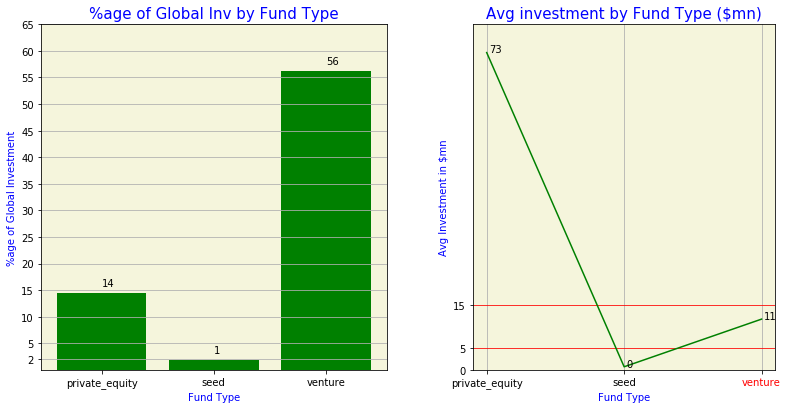

In [82]:

#
# Plot graph 1 using data in inv_by_ft created above
#

import matplotlib.pyplot as plt
import seaborn as sns


ft = inv_by_ft['funding_round_type']
ft_perc = inv_by_ft['raised_amount_%']
ft_avg = inv_by_ft['avg_amount_usd']

fig = plt.figure()

#
# Set up options for subplot to show %age investments and plot the graph
#
ax1_yticks = [2,5,10,15,20,25,30,35,40,45,50,55,60,65]
ax1_coords = [0.1, 0.1, 0.8, 1.2]
ax1 = fig.add_axes(ax1_coords, fc='beige',yticks=ax1_yticks, ylim=[0,65])

ax1.title.set_color('blue')
ax1.set_title('%age of Global Inv by Fund Type', fontsize=15)
ax1.set_xlabel("Fund Type", color='blue')
ax1.set_ylabel("%age of Global Investment", color='blue')
ax1.grid(axis='y', which='major')

#annotate data points
for i,j in zip(ft,ft_perc):
    ax1.annotate('%d' %j, xy=(i,j), xytext=(0,7), textcoords='offset points')
  
#ax1.tick_params(axis='x', labelcolor ='b')
ax1.bar(ft, ft_perc, color='green')


#
# Set up plot options for subplot to show average investment and plot the graph
#

ax2_coords = [1.1, 0.1, 0.7, 1.2]
ax2_yticks = [0,5,15]
ax2 = fig.add_axes(ax2_coords, fc='beige', ylim=[0,80], yticks=ax2_yticks)

ax2.set_title('Avg investment by Fund Type ($mn)', fontsize=15)
ax2.set_xlabel("Fund Type", color='blue')
ax2.set_ylabel("Avg Investment in $mn", color='blue')
ax2.grid(axis='y', which='major')
ax2.grid(axis='x', which='major')

ax2.title.set_color('blue')
ax2.tick_params(axis='y',grid_color='red')

# set color for "venture" differently
[t.set_color(i) for (i,t) in
 zip(['black','black','red'],ax2.xaxis.get_ticklabels())]

# annotate data points
for i,j in zip(ft,ft_avg):
    ax2.annotate('%d' %j, xy=(i,j), xytext=(2,0), textcoords='offset points')
    #ax2.annotate('(%s,' %i, xy=(i,j))


ax2.plot(ft, ft_avg, color='green')



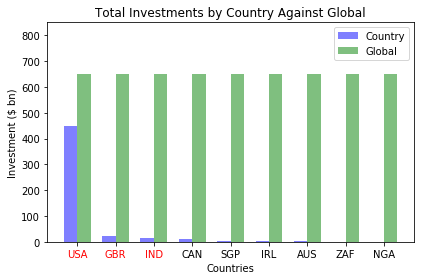

In [23]:
#
#  Plot Graph #2
#
#    Plot showing the top 9 countries against the total amount of investments of funding type FT 
#    with emphashis on the top 3 countries (Country 1, Country 2, and Country 3).
#

#
# use the top9 data created earliers 

import matplotlib.pyplot as plt

# set up list of countries (for x-axis labels)
country_list = top9.index.values.tolist()

# set up the country specific values list for the country bar in $billions
inv_country=(round(top9.raised_amount_usd/1000000000,2)).tolist()

# calculate the global/ww total inv in $billions
ft_total_inv = inv_by_ft.loc[inv_by_ft.funding_round_type == pref_FT]['raised_amount_usd']/1000000000

# set up the single global/ww "list" for the global bar
n_groups = top9.count().values[0]
inv_ww = ft_total_inv.values.tolist()*n_groups


# setup the plotting parameters
fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.35
opacity = 0.5

rects1 = ax.bar(index, inv_country, bar_width,
                alpha=opacity, color='b',
                label='Country')

rects2 = ax.bar(index+bar_width,inv_ww, bar_width,
                alpha=opacity, color='g',
                label='Global')

ax.set_title('Total Investments by Country Against Global', fontsize=12)
ax.set_xlabel('Countries')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(country_list)

ax.set_ylabel('Investment ($ bn)')

u_bound = ft_total_inv.tolist()[0]+200
ax.set_ybound(lower=0, upper=u_bound)

ax.legend()

# set a different color for top 3 countries 
[t.set_color(i) for (i,t) in
 zip(['r','r','r','black','black','black','black','black','black'],ax.xaxis.get_ticklabels())]


fig.tight_layout()
plt.show()


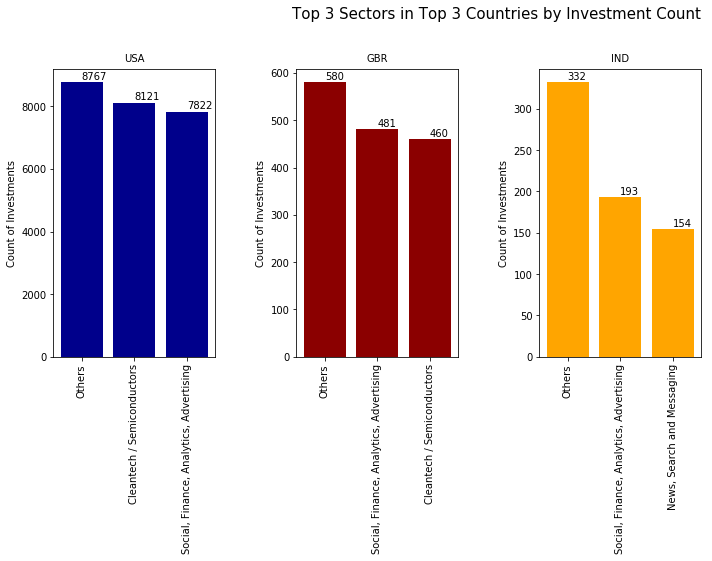

In [86]:
#
#  Plot Graph #3
#
#    Plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart 
#    (for the chosen investment type FT). 
#

#
# Setup Data for the plot
#


# get the names of the top 3 country from the top9 data frame created earlier which is sorted desc by investment
countries = [top9.iloc[0].name, top9.iloc[1].name, top9.iloc[2].name]

#get the top3 sectors data for each country from previously created D1/D2/D3 sector stats dataframe
C1_top3_sectors = D1_sector_stats.sort_values(by='sector_inv_count',ascending=False)[0:3]
C2_top3_sectors = D2_sector_stats.sort_values(by='sector_inv_count',ascending=False)[0:3]
C3_top3_sectors = D3_sector_stats.sort_values(by='sector_inv_count',ascending=False)[0:3]

#get sector names for the top 3 sectors in each country
C1_sector_names = C1_top3_sectors.main_sector.tolist()
C2_sector_names = C2_top3_sectors.main_sector.tolist()
C3_sector_names = C3_top3_sectors.main_sector.tolist()

#get investment counts for the top 3 sectors in each country
C1_sector_count = C1_top3_sectors.sector_inv_count.tolist()
C2_sector_count = C2_top3_sectors.sector_inv_count.tolist()
C3_sector_count = C3_top3_sectors.sector_inv_count.tolist()

#
# Plot Settings
#

f, (ax1, ax2, ax3) = plt.subplots(1, 3)
fig_title = "Top 3 Sectors in Top 3 Countries by Investment Count"
#fig.canvas.set_window_title(fig_title)

ax1.bar(C1_sector_names, C1_sector_count, width=0.8, color='darkblue')
ax2.bar(C2_sector_names, C2_sector_count, width=0.8, color='darkred')
ax3.bar(C3_sector_names, C3_sector_count, width=0.8, color='orange')

rotangle = 90
ax1.set_xticklabels(C1_sector_names, rotation=rotangle)
ax2.set_xticklabels(C2_sector_names, rotation=rotangle)
ax3.set_xticklabels(C3_sector_names, rotation=rotangle)

xpad = -500
ax1.set_xlabel(countries[0], labelpad=xpad)
ax2.set_xlabel(countries[1], labelpad=xpad)
ax3.set_xlabel(countries[2], labelpad=xpad)

ylabel = "Count of Investments"
ax1.set_ylabel(ylabel)
ax2.set_ylabel(ylabel)
ax3.set_ylabel(ylabel)


# annotate data points
for i,j in zip(C1_sector_names,C1_sector_count):
    ax1.annotate('%d' %j, xy=(i,j), xytext=(0,3), textcoords='offset points')
for i,j in zip(C2_sector_names,C2_sector_count):
    ax2.annotate('%d' %j, xy=(i,j), xytext=(0,3), textcoords='offset points')
for i,j in zip(C3_sector_names,C3_sector_count):
    ax3.annotate('%d' %j, xy=(i,j), xytext=(0,3), textcoords='offset points')


plt.title(fig_title, fontsize=15, pad=50, loc='right')
#plt.title(fig_title, pad=50, loc='right')
plt.subplots_adjust(left=0, bottom=0, right=1.5, top=1, wspace=0.5, hspace=0)


plt.show()

